# Question 1.
Implement a two-layer perceptron with the backpropagation algorithm to solve the parity problem.
You must implement the forward and backpropagation paths entirely on your own,
including an implementation of a perceptron and the activation function. The desired
output for the parity problem is 1 if an input pattern (which contains 4-binary bits) contains an odd
number of 1's, and 0 otherwise. Follow the algorithm introduced in class. The learning procedure
is stopped when an absolute error (di erence) of 0.05 is reached for every input pattern.

In [ ]:
import numpy as np
import pandas as pd
import math
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

For the parity problem we will define our inputs based on 4 bits, so we will have 16 permutations. Our labels is either 1 or 0, 1 if the number of 1s is odd and 0 if the number of 1s is even. We will add 1 extra bit to our input layer with 1 value as our x0 for our bias term in each layer.

In [ ]:
X = np.array([[1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], 
                  [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], 
                  [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 0, 0], 
                  [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1],
                  [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], 
                  [1, 1, 1, 1, 1]])

Y = np.array([[0], [1], [1], 
                  [0], [1], [0], 
                  [0], [1], [1], 
                  [0], [0], [1],
                  [0], [1], [1], 
                  [0]])
# print(X, 'X')
# print(Y, 'Y')

As we have five (four inputs + 1 bias) inputs, we will define 5 inputs for our input layer, and since we want to predict 1 or 0 for the parity problem, we will set 1 neuran for our output layer.
Then, we will set 1 layer as our hidden layer, and we will try different number of neurans for our hidden layer to check performance and convergence.


*   We will define our perceptron structure in our layer variable when making an instance of our network.
*   We will initialize weights and deltas based on the number of input neurans, hidden nuerans + bias and the output layer.


*   forward method: After multiplying the input with the weights in each layer, we will use the logistic sigmoid function as our activation function, and return the predicted result in the forward method.
*   backpropagation method: In the backpropagation method, we will compute the delta for each layer, and we will update the weights and biases based on the deltas. We will use the derivative of the logistic sigmoid, and will update the weights based on momentum 0 and 0.9.





# Neural Network 

In [ ]:
class DNN(object):
    def __init__(self, inputLayerSize, hiddenLayerSize, num_hid_units, outputLayerSize):
      self.inputLayerSize = inputLayerSize
      self.hiddenLayerSize = hiddenLayerSize
      self.num_hid_units = num_hid_units
      self.outputLayerSize = outputLayerSize
      Layers = [self.inputLayerSize, self.num_hid_units, self.outputLayerSize]
      # print([self.inputLayerSize, self.num_hid_units, self.outputLayerSize], 'Layer')
      self.Layers = Layers
      #Set Random Weights and Biases except for the output and save them for updtaes in backpropagation
      self.Weights = [np.random.uniform(-1, 1, (self.inputLayerSize, self.num_hid_units))] + [np.random.uniform(-1, 1, (self.num_hid_units+1, self.outputLayerSize))]
      #Initialize delta with zeros
      self.delta = [np.zeros((self.inputLayerSize, self.num_hid_units))] + [np.zeros((self.num_hid_units+1, self.outputLayerSize))]

    #Make predictions
    def forward(self, x):
      output = []
      output.append(self.sigmoid(np.dot(self.Weights[0].T,x)))
      output.append(self.sigmoid(np.dot(self.Weights[1].T,np.insert(output[0],0,1,axis=0))))
      return np.array(output)

    def sigmoid(self, z):
        #apply sigmoid activation function to activation potential
        return 1/ (1+np.exp(-z))

    def backpropagation(self, x, predicted, label, lr, mmntm):
      y_output = predicted[1]

      delta_output = y_output*(1-y_output)*(label-y_output)
      self.delta[1] = lr*delta_output.T*np.insert(predicted[0],0,1,axis=0)+(mmntm*self.delta[1])

      delta_hidden = predicted[0]*(1-predicted[0])*self.Weights[1][1:,:]*delta_output
      self.delta[0] = lr*delta_hidden.T*x+(mmntm*self.delta[0])

      self.Weights[0] += self.delta[0]
      self.Weights[1] += self.delta[1]
          
    def train(self, X_train, y_train, X_test, y_test, lr, momentum):
      # print(X, 'X', y, 'y', lr, 'lr', momentum, 'momentum')

      #update weight & bias
      epoch = 0
      mse = []
      test_mse = []
      while True:
        #Train
        min_error = False
        #print(epoch, 'epoch', lr, 'learning rate', momentum, 'momentum')
        error_arr = []
        sum_error = 0
        #Shuffle inputs and outputs
        X_tr, y_tr = shuffle(X_train, y_train, random_state=0)
        for i in range(len(X_tr)):
            x = X_train[i].reshape(self.inputLayerSize, self.outputLayerSize)
            #get the predicted label using the forward propagations function
            pred_Y = self.forward(x)
            #compute the deltas and update the weights for all the layers accordingly
            self.backpropagation(x, pred_Y, y_train[i], lr, momentum)
            error_arr.append(np.abs(np.squeeze(y_train[i]-pred_Y[1])))
            #print(np.abs(np.squeeze(y_train[i]-pred_Y[1])), 'error')
            #update the weights and biases as long as the error is greater than 5%
            if np.abs(np.squeeze(y_train[i]-pred_Y[1])) > 0.05:
                min_error = True
        #comput mse for all the inputs in each epoch
        for err in error_arr:
          sum_error += err**2
        # print(sum_error, 'sum error')
        mse.append(sum_error/len(X))
  
        #Test
        test_error_arr = []
        test_sum_error = 0
        #Shuffle inputs and outputs
        X_ts, y_ts = X_test, y_test
        for i in range(len(X_ts)):
            x = X_ts[i].reshape(self.inputLayerSize, self.outputLayerSize)
            #get the predicted label using the forward propagations function
            pred_Y = self.forward(x)
            test_error_arr.append(np.abs(np.squeeze(y_ts[i]-pred_Y[1])))
            # print(np.abs(np.squeeze(y_ts[i]-pred_Y[1])), 'test error')
        #comput mse for all the inputs in each epoch
        for err in test_error_arr:
          test_sum_error += err**2
        test_mse.append(test_sum_error/len(X_ts))
        epoch += 1
        #stop the learning if the error is less than 5%
        if not min_error:
            break
        
      return (epoch, mse, test_mse)



# Changing Number of Neurons

Now, we change the number of neurons from 4 to 10 and compare the learning curves.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


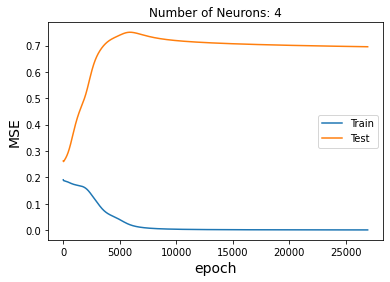

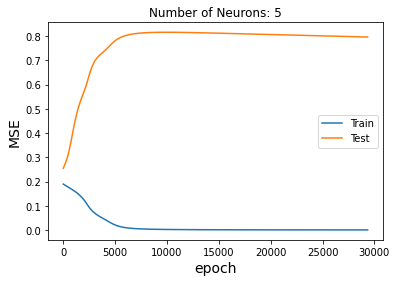

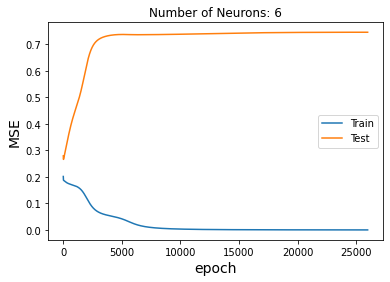

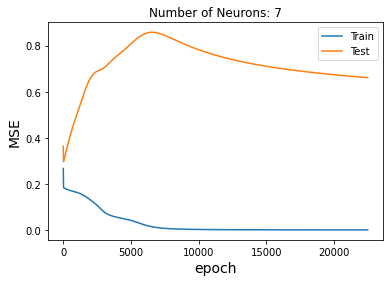

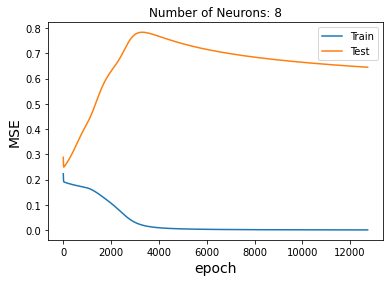

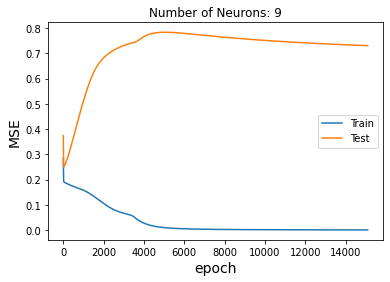

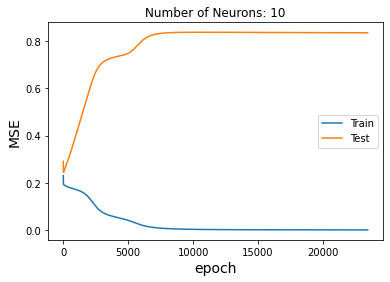

y:  [26955 29352 25972 22506 12735 15094 23438]


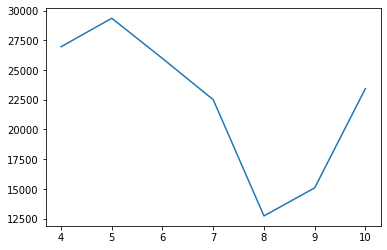

In [ ]:
total_epochs = []
for i in range(4,11):
  NN = DNN(inputLayerSize = 5, hiddenLayerSize = 1, num_hid_units = i, outputLayerSize = 1)
  #without momentum, with learning rate 0.05
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  epoch, mse, test_mse = NN.train(X_train, y_train, X_test, y_test, 0.05, 0)
  total_epochs.append(epoch)
  plt.plot(mse, label='Train')
  plt.plot(test_mse, label='Test')
  plt.ylabel('MSE', fontsize = 14)
  plt.xlabel('epoch', fontsize = 14)
  plt.title('Number of Neurons: ' + str(i))
  plt.legend()
  plt.show()

total_epochs = np.array(total_epochs)
z = [4, 5, 6, 7, 8, 9, 10]
plt.plot(z, total_epochs)

As we observe from the above plot, as the number of neurons increases from 4 to 8, the number of epochs required for convergence decrease. However, increasing the number of neurons above 8 results in an increase in the convergence time. Thus, we choose 8 as the optimal number for the rest of the analysis.

# Changing the Learning Rate

We will train our model with a learning rate of 5%, increase by 5% until the learning rate reaches 50%. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


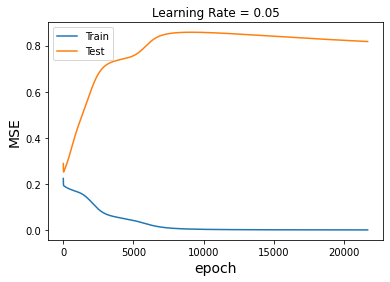

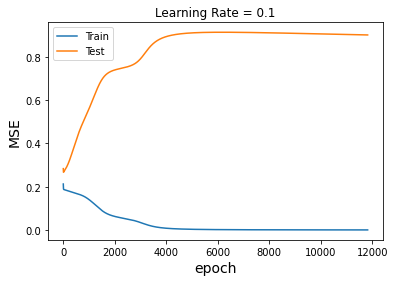

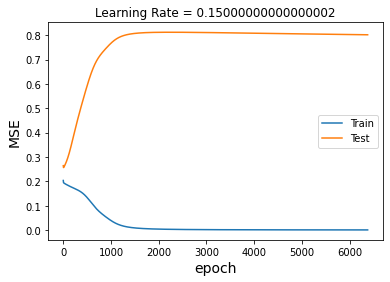

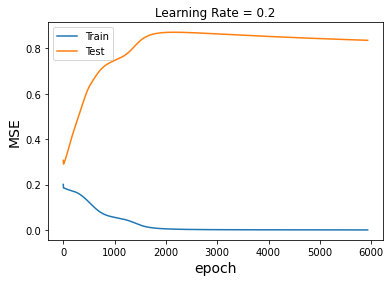

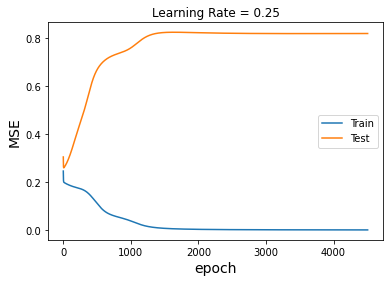

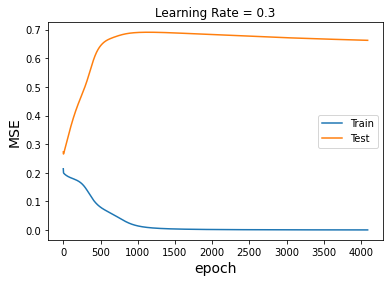

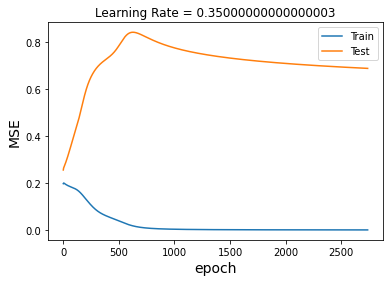

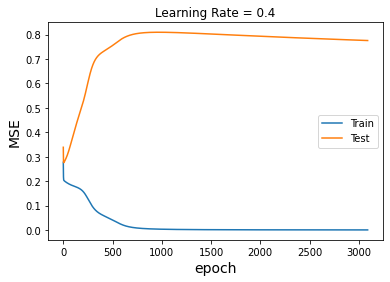

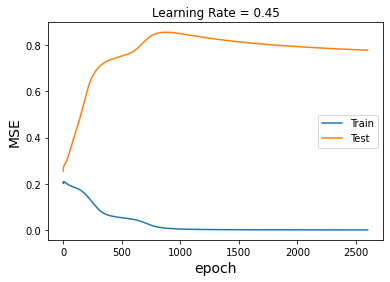

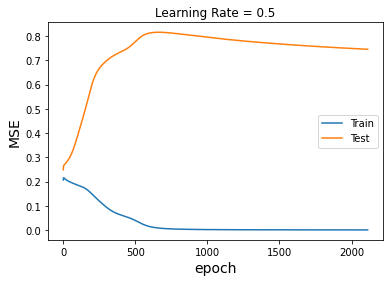

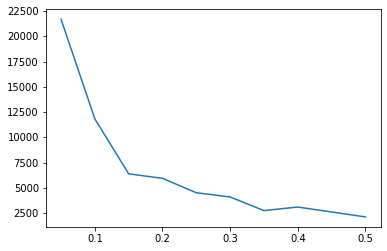

In [ ]:
total_epochs = []
for lr in np.arange(0.05, 0.51, 0.05):
  NN = DNN(inputLayerSize = 5, hiddenLayerSize = 1, num_hid_units = 8, outputLayerSize = 1)
  #without momentum
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  epoch, mse, test_mse = NN.train(X_train, y_train, X_test, y_test, lr, 0)
  total_epochs.append(epoch)
  plt.plot(mse, label='Train')
  plt.plot(test_mse, label='Test')
  plt.ylabel('MSE', fontsize = 14)
  plt.xlabel('epoch', fontsize = 14)
  plt.title('Learning Rate = ' + str(lr))
  plt.legend()
  plt.show()

total_epochs = np.array(total_epochs)
z = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.plot(z, total_epochs)
plt.show()

As it is evident from the above graphs, as the learning rate increases, the model converges faster. 

# Changing Momentum

Now we change the momentum from 0 to 0.9, while increasing the learning rate from 0.05 to 0.5 with 0.05 step.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


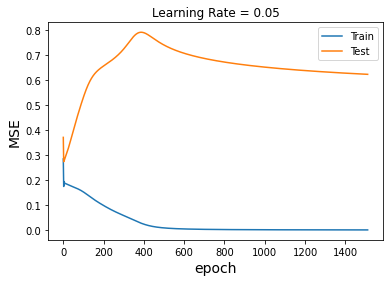

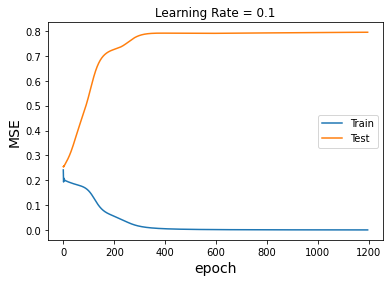

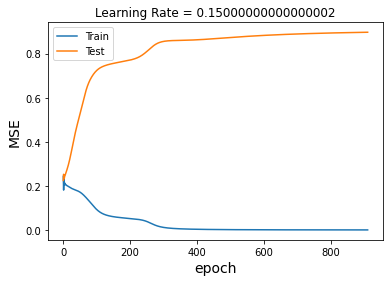

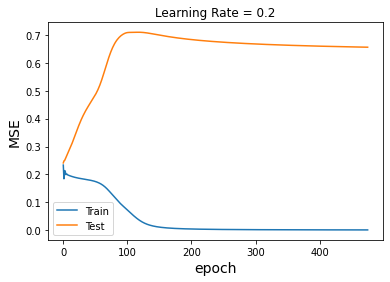

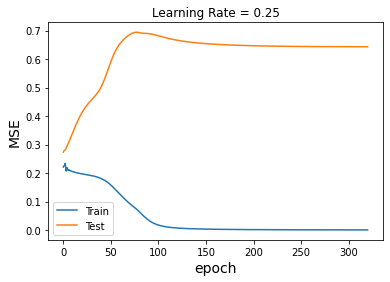

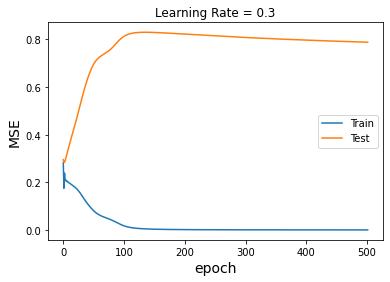

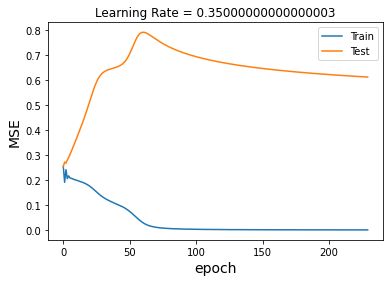

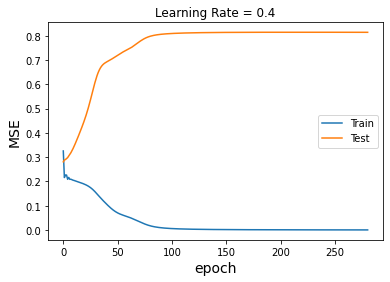

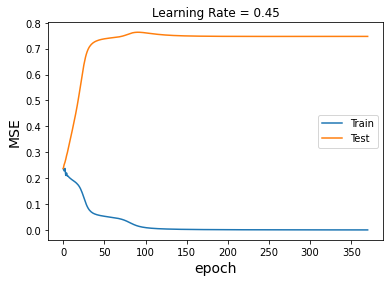

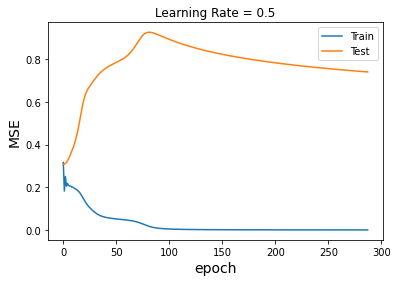

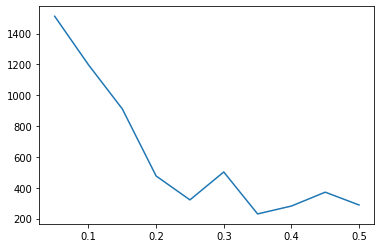

In [ ]:
total_epochs = []
for lr in np.arange(0.05, 0.51, 0.05):
  NN = DNN(inputLayerSize = 5, hiddenLayerSize = 1, num_hid_units = 8, outputLayerSize = 1)
  #without momentum
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
  epoch, mse, test_mse = NN.train(X_train, y_train, X_test, y_test, lr, 0.9)
  total_epochs.append(epoch)
  plt.plot(mse, label='Train')
  plt.plot(test_mse, label='Test')
  plt.ylabel('MSE', fontsize = 14)
  plt.xlabel('epoch', fontsize = 14)
  plt.title('Learning Rate = ' + str(lr))
  plt.legend()
  plt.show()

total_epochs = np.array(total_epochs)
z = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.plot(z, total_epochs)
plt.show()

We observe that adding the momentum to the model, increases the convergence speed significantly (on average by order of ten).